<a href="https://colab.research.google.com/github/mae001/Machine-Learning-projects/blob/main/gradient_descent_alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = preprocessing.StandardScaler()
# .fit
# .transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
housing.target_names

['MedHouseVal']

In [ ]:
X_train = pd.DataFrame (data = X_train, columns=housing.feature_names)
X_train['Price'] = list(y_train)

X_test = pd.DataFrame (data = X_test, columns=housing.feature_names)
X_test['Price'] = list(y_test)

In [ ]:
X_train.head(5) #first 5 rows

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,0.133506,0.509357,0.181060,-0.273850,-0.184117,-0.010825,-0.805682,0.780934,1.93800
1,-0.532218,-0.679873,-0.422630,-0.047868,-0.376191,-0.089316,-1.339473,1.245270,1.69700
2,0.170990,-0.362745,0.073128,-0.242600,-0.611240,-0.044800,-0.496645,-0.277552,2.59800
3,-0.402916,-1.155565,0.175848,-0.008560,-0.987495,-0.075230,1.690024,-0.706938,1.36100
4,-0.299285,1.857152,-0.259598,-0.070993,0.086015,-0.066357,0.992350,-1.430902,5.00001


In [ ]:
def sgd_regressor(X, y, learning_rate=0.2, n_epochs=1000, k=40):

  w = np.random.randn(1, 8)
  b = np.random.randn(1, 1) #biased

  epoch=1

  while epoch <= n_epochs:  # repeat it by 1000 epochs

    temp = X.sample(k)           # dataframe - den random 40 row sample et
    X_tr = temp.iloc[:,0:8].values   # ilk 9 column-u data kimi gotur
    y_tr = temp.iloc[:, -1].values    #son column-u target kimi saxla

    Lw = w                        #bashlangic weightleri randomdan kopyala
    Lb = b

    loss = 0                #baslangic loss 0
    y_pred = []
    sq_loss = []

    for i in range(k):  #her row uchun tekrar et


      Lw = (-2/k * X_tr[i]) * (y_tr[i] - X_tr[i].dot(w.T) - b)     #lossun hemen rowdaki toremesini hesablayir
      Lb = ( -2/k) * (y_tr[i] - X_tr[i].dot(w.T)-b)

      w = w - learning_rate * Lw                    # toremeye gore weightleri duzelt
      b = b - learning_rate * Lb

      y_predicted = np.dot(X_tr[i], w.T)                # yeni weightleri predict et
      y_pred.append(y_predicted)                         # yeni weightleri yadda saxla

    loss = mean_squared_error(y_pred, y_tr)              #epoxa erzinde toplanmis y_pred ve targetler esasinda MSE hesabla
                                                        # (y_pred - y_tr)**2
    print('Epoch: %d, Loss: %.3f' %(epoch, loss))
    epoch+=1
    learning_rate = learning_rate/1.02                       #learning ratei azalt

  return w,b                      # sonda train olunmush weight, biaslari gaytar

In [ ]:
w, b = sgd_regressor(X_train, y_train)

Epoch: 1, Loss: 8.340
Epoch: 2, Loss: 5.612
Epoch: 3, Loss: 5.567
Epoch: 4, Loss: 4.350
Epoch: 5, Loss: 5.387
Epoch: 6, Loss: 5.452
Epoch: 7, Loss: 5.332
Epoch: 8, Loss: 4.205
Epoch: 9, Loss: 4.182
Epoch: 10, Loss: 4.810
Epoch: 11, Loss: 4.296
Epoch: 12, Loss: 11989.374
Epoch: 13, Loss: 4.184
Epoch: 14, Loss: 5.989
Epoch: 15, Loss: 5509.209
Epoch: 16, Loss: 62.647
Epoch: 17, Loss: 33.494
Epoch: 18, Loss: 163.920
Epoch: 19, Loss: 23.966
Epoch: 20, Loss: 12.230
Epoch: 21, Loss: 26.738
Epoch: 22, Loss: 14.880
Epoch: 23, Loss: 14.629
Epoch: 24, Loss: 6.884
Epoch: 25, Loss: 9.562
Epoch: 26, Loss: 7.732
Epoch: 27, Loss: 13.707
Epoch: 28, Loss: 8.186
Epoch: 29, Loss: 7.346
Epoch: 30, Loss: 9.175
Epoch: 31, Loss: 14.424
Epoch: 32, Loss: 7.969
Epoch: 33, Loss: 9.686
Epoch: 34, Loss: 9.031
Epoch: 35, Loss: 13.912
Epoch: 36, Loss: 6.977
Epoch: 37, Loss: 7.802
Epoch: 38, Loss: 11.533
Epoch: 39, Loss: 9.087
Epoch: 40, Loss: 5.772
Epoch: 41, Loss: 6.886
Epoch: 42, Loss: 10.376
Epoch: 43, Loss: 7.665

In [ ]:
y_pred_customsgd = (X_test.iloc[:, 0:8].values @ w.T + b).flatten()

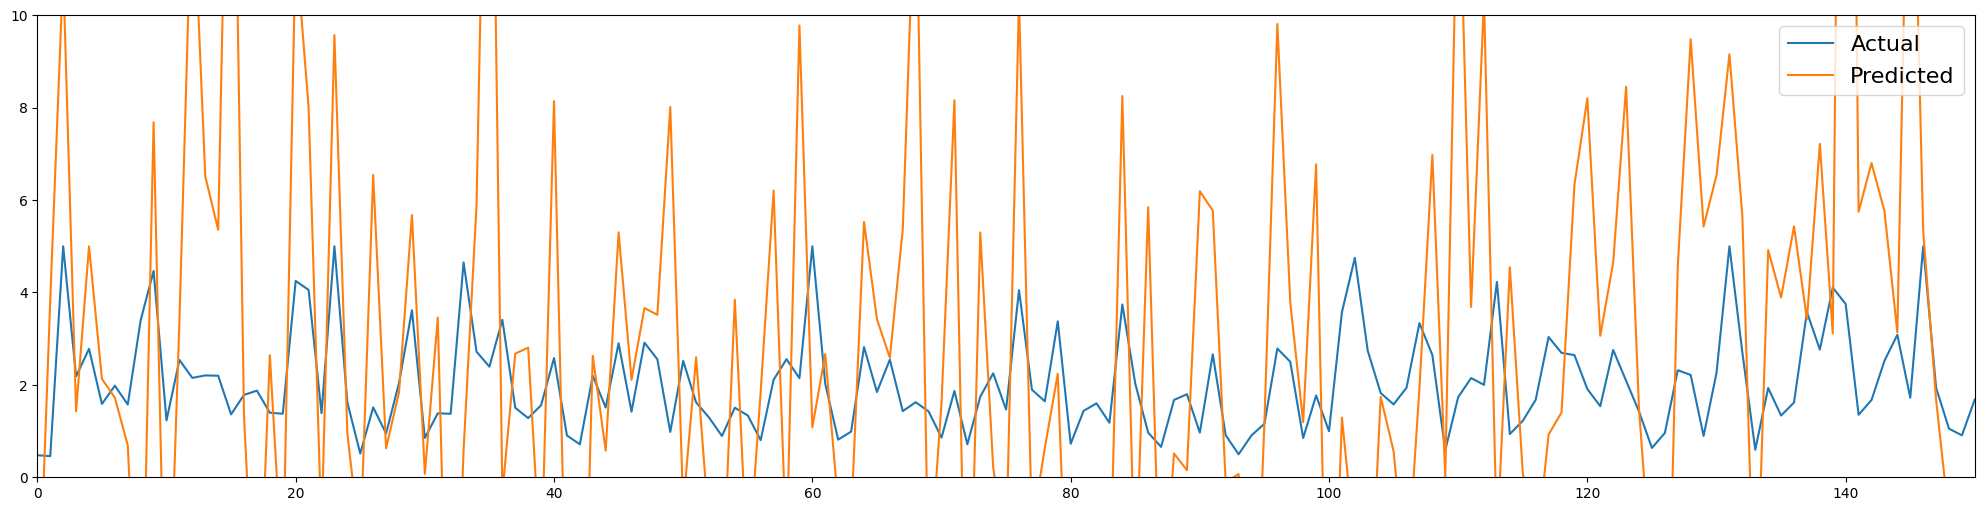

In [ ]:
plt.figure(figsize=(25,6))                  # figureu gur
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size':16})
plt.xlim((0, 150))
plt.ylim((0, 10))
plt.show()

# sklearn

In [ ]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

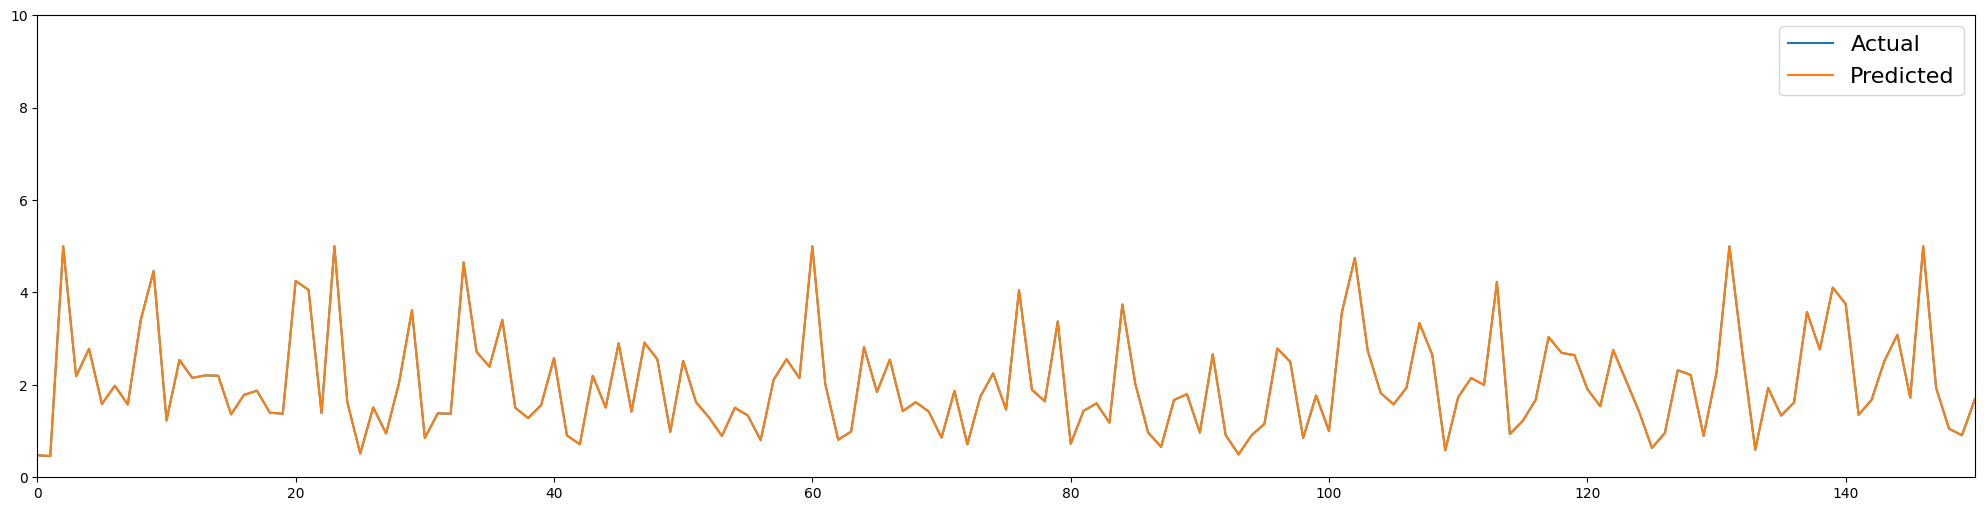

Mean squared Error : 4.1983815116883404e-07


In [ ]:
plt.figure(figsize=(25,6))                  # figureu gur
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size':16})
plt.xlim((0, 150))
plt.ylim((0, 10))
plt.show()
print('Mean squared Error :', mean_squared_error(y_test, y_pred))

**Multilayer perceptron**

In [ ]:
from sklearn import datasets
import numpy as np

In [ ]:
iris = datasets.load_iris()

X=iris["data"][:, (2, 3)]
y=(iris["target"] == 2).astype(int)

y=y.reshape([150, 1])
X.shape, y.shape

((150, 2), (150, 1))

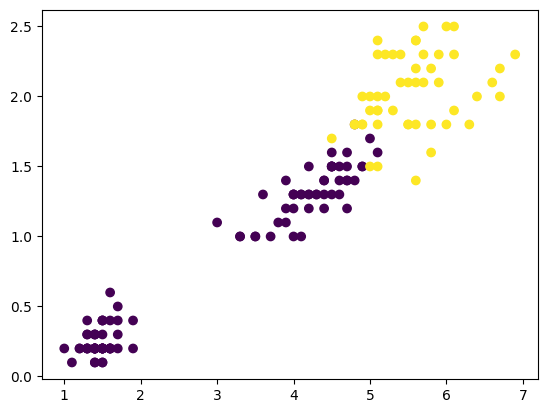

In [ ]:
import matplotlib.pyplot as plt

_, ax = plt.subplots() # fig, ax muveggeti variable
scatter = ax.scatter(X[:, 0], X[:, 1], c=y)


In [ ]:
X.shape

(150, 2)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
  s = sigmoid(z)
  return s * ( 1 - s )


In [ ]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size        # 2 in (150, 2)
        self.hidden_size = hidden_size      # 4
        self.output_size = output_size      # 1
        self.learning_rate = learning_rate  # 0.01

        # initialize weights randomly
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)  # (2, 4)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size) # (4, 1)

        # initialize biases to -1
        self.bias1 = -1*np.ones((1, self.hidden_size))  # (1, 4)
        self.bias2 = -1*np.ones((1, self.output_size))  # (1, 1)

    def fit(self, X, y, epochs=1000):
        for epoch in range(epochs):
            # feedforward
            layer1 = X.dot(self.weights1) + self.bias1  # (150, 4)
            activation1 = sigmoid(layer1)               # (150, 4)

            layer2 = activation1.dot(self.weights2) + self.bias2    # (150, 1)
            activation2 = sigmoid(layer2)                           # (150, 1)

            # backpropagation -------- murphy page 432
            error = activation2 - y                                                         # (150, 1)
            d_weights2 = activation1.T.dot(error * sigmoid_derivative(layer2))              # (4, 1)
            d_bias2 = np.sum(error * sigmoid_derivative(layer2), axis=0, keepdims=True)     # (1, 1)

            error_hidden = error.dot(self.weights2.T) * sigmoid_derivative(layer1)          # (150, 4)
            d_weights1 = X.T.dot(error_hidden)                                              # (2, 4)
            d_bias1 = np.sum(error_hidden, axis=0, keepdims=True)                           # (1, 4)

            # update weights and biases
            self.weights2 -= self.learning_rate * d_weights2    # (4, 1)
            self.bias2 -= self.learning_rate * d_bias2          # (1, 4)
            self.weights1 -= self.learning_rate * d_weights1    # (2, 4)
            self.bias1 -= self.learning_rate * d_bias1          # (1, 4)

    def predict(self, X):
        layer1 = X.dot(self.weights1) + self.bias1
        activation1 = sigmoid(layer1)
        layer2 = activation1.dot(self.weights2) + self.bias2
        activation2 = sigmoid(layer2)
        return (activation2 > 0.5).astype(int)



In [ ]:
mlp = MLP(input_size=2, hidden_size=4, output_size=1)

# train the MLP on the training data
mlp.fit(X, y)

# make predictions on the test data
y_pred = mlp.predict(X)

# evaluate the accuracy of the MLP
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96
